### Today objectives
1. Simple Linear Regression
2. Realtime dataset of BOSTON set
3. Polynomial features for Linear Regression(Non-Linear Regression)

In [1]:
import pandas as pd
df = pd.read_csv('employeeSalary.csv')
print(df)

   Experience  Salary
0         0.6   10000
1         1.0   12000
2         2.0   15000
3         3.0   20000
4         5.0   28000
5         7.0   35000
6        10.0   55000
7        12.0   90000
8        15.0  160000


**df.corr()**
findout the relation of each column with remaining columns

In [2]:
df.corr()

,Experience,Salary
Experience,1.00000,0.92832
Salary,0.92832,1.00000


**corr()  value -1 to 1**

-1 negative relation (opposite linearity)

+1  Positive relation( forward linearity)

0   there is no relation


plt.scatter(Xvalues,yvalues,marker='o')

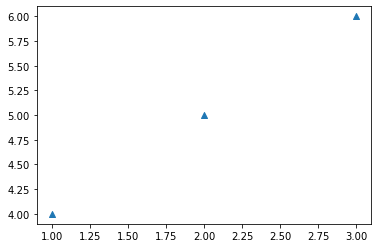

In [4]:
import matplotlib.pyplot as plt
plt.scatter([1,2,3],  [4,5,6] , marker='^')
plt.show()             #for marker we can use o to get circle..so on

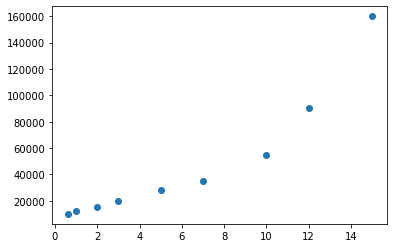

In [5]:
plt.scatter(df['Experience'], df['Salary'],marker='o')
plt.show()    #now as per our .csv file values

In [6]:
# importing algorithm
from sklearn.linear_model import LinearRegression

# creating object
lrModel = LinearRegression()

# training the model fit(features,target)
lrModel.fit(df[['Experience']] , df['Salary']  )

LinearRegression()

lrModel.predict([ [f1Value, f2Value,f3Value,...]  ])

In [7]:
lrModel.predict( [[15]]  )

array([125490.52408462])

In [8]:
lrModel.predict( [[12]]  )

array([98875.3584639])

In [9]:
lrModel.predict( [[1]]  )

array([1286.41785462])

**To test model**
1. Accuracy Score (improve)
2. Error (reduce as possible)

**model.score(features,actual_target)**

In [10]:
lrModel.score(df[['Experience']],   df['Salary'])

0.8617785601698374

In [11]:
print("efficiency of model ",lrModel.score(df[['Experience']],   df['Salary'])*100)

efficiency of model  86.17785601698374


**finding error**

In [12]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_actual,    y_predict)

In [13]:
y_predict = lrModel.predict(df[['Experience']])
y_predict

array([ -2262.27089481,   1286.41785462,  10158.13972819,  19029.86160176,
        36773.3053489 ,  54516.74909605,  81131.91471676,  98875.3584639 ,
       125490.52408462])

In [15]:
mean_squared_error(df['Salary'],y_predict)

299995130.4323733

#### Now we can apply realtime dataset of boston dataset

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [17]:
boston.filename

'/home/student/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [18]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### converting data into dataframe

In [19]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
df = pd.DataFrame(boston['data'])
df.columns = boston['feature_names']

df.head(5) # top 5 rows of df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**How many rows and columns in df**

In [21]:
df.shape # (rows,columns)

(506, 13)

In [22]:
df['target'] = boston['target']
df.shape

(506, 14)

In [23]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [24]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**According to corr() RM column has relation value 0.695360 so I am considering it as the feature**

In [25]:
X = df[['RM']]
y = df['target']

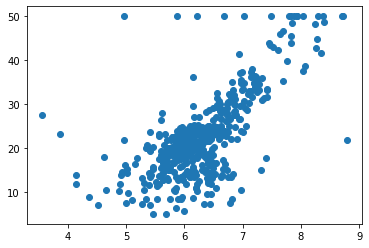

In [26]:
plt.scatter(df['RM'],  y,marker='o')
plt.show()

In [27]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

**To find missing value in df**

In [28]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(X,y)
lrModel.score(X,y)

0.48352545599133423

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y,   lrModel.predict(X)  )

43.60055177116956

In [32]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


**my model got only 43% so i am adding another feature LSTAT**

In [33]:
X = df[['RM', 'LSTAT']]
y = df['target']

In [34]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(X,y)
lrModel.score(X,y)

0.6385616062603403

In [35]:
mean_squared_error(y,   lrModel.predict(X)  )

30.51246877729947

In [36]:
X = df[['LSTAT']]
y = df['target']
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(X,y)
lrModel.score(X,y)

0.5441462975864799

In [37]:
type(df['target']) # single dimension

pandas.core.series.Series

In [38]:
type(df[['target']]) # 2d

pandas.core.frame.DataFrame

In [39]:
lrModel.coef_ # m

array([-0.95004935])

In [40]:
lrModel.intercept_ #

34.55384087938311

ypredict = mx+c

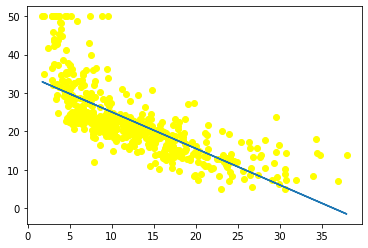

In [41]:
plt.scatter(df['LSTAT'],df['target'],c='yellow')
plt.plot(df['LSTAT'],  lrModel.coef_ * df['LSTAT']  + lrModel.intercept_  )
plt.show()

### 3. Polynomial features

1. step1  import polynomial features
2. step2  create object to polyfeatures
3. step3  transform existing features to higher order
4. step4 use the transformed features for training and testing

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X = df[['RM','LSTAT']]
y = df['target']

X_poly_features = poly.fit_transform(X)

linModel = LinearRegression()
linModel.fit(X_poly_features,   y)
linModel.score(X_poly_features, y )


0.7572658522486413

In [71]:
mean_squared_error(y, linModel.predict(X_poly_features))

20.49150901711481